In [267]:
# @title Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [268]:
plt.rcParams['figure.figsize'] = [8,6]

In [269]:
# @title Data
# create own dataset
np.random.seed(1)
x = abs(np.random.normal(5, 2, 50).astype(int))
y = abs(np.random.normal(5, 2, 50).astype(int))
df = pd.DataFrame({'x':x, 'y':y})
df.T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
x,8,3,3,2,6,0,8,3,5,4,...,4,3,3,8,5,3,5,9,5,6
y,5,4,2,4,4,6,6,6,5,6,...,7,5,4,3,5,5,4,5,3,6


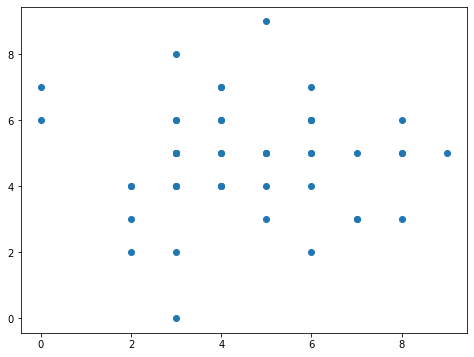

In [270]:
# Scatter
plt.scatter(df['x'], df['y'])
plt.show()

In [271]:
# @title Centroids and K
k = 3
centroids = pd.DataFrame({'c1': (2,4), 'c2': (4,5), 'c3': (6,8)}, index=['x', 'y'])
centroids

,c1,c2,c3
x,2,4,6
y,4,5,8


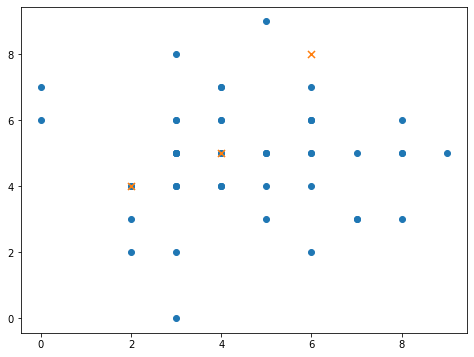

In [272]:
plt.scatter(df['x'], df['y'])
plt.scatter(centroids.loc['x'], centroids.loc['y'], marker='x', s=50)
plt.show()

In [273]:
# @title Distance from centroids
distances = df
ct = centroids
distances[['c1x', 'c1y', 'c2x', 'c2y', 'c3x', 'c3y']] = list(ct['c1']) + list(ct['c2']) + list(ct['c3'])
distances['d1'] = distances.eval('((x-c1x)**2 + (y-c1y)**2)**0.5').round(1)
distances['d2'] = distances.eval('((x-c2x)**2 + (y-c2y)**2)**0.5').round(1)
distances['d3'] = distances.eval('((x-c3x)**2 + (y-c3y)**2)**0.5').round(1)
distances.head()

,x,y,c1x,c1y,c2x,c2y,c3x,c3y,d1,d2,d3
0,8,5,2,4,4,5,6,8,6.1,4.0,3.6
1,3,4,2,4,4,5,6,8,1.0,1.4,5.0
2,3,2,2,4,4,5,6,8,2.2,3.2,6.7
3,2,4,2,4,4,5,6,8,0.0,2.2,5.7
4,6,4,2,4,4,5,6,8,4.0,2.2,4.0


In [274]:
# @title Clustering iteration 1
distances['cluster'] = distances[['d1', 'd2', 'd3']].idxmin(axis=1)
distances['cluster'] = distances['cluster'].apply(lambda x: int(x.replace('d', '')))
distances.head()

,x,y,c1x,c1y,c2x,c2y,c3x,c3y,d1,d2,d3,cluster
0,8,5,2,4,4,5,6,8,6.1,4.0,3.6,3
1,3,4,2,4,4,5,6,8,1.0,1.4,5.0,1
2,3,2,2,4,4,5,6,8,2.2,3.2,6.7,1
3,2,4,2,4,4,5,6,8,0.0,2.2,5.7,1
4,6,4,2,4,4,5,6,8,4.0,2.2,4.0,2


In [303]:
def objective_function():
  sum_sq_dist = 0
  for i, v in enumerate(df['cluster']):
    if v == 1: 
      sum_sq_dist += df['d1'][i]
    if v == 2: 
      sum_sq_dist += df['d2'][i]
    if v == 3: 
      sum_sq_dist += df['d3'][i]
  return sum_sq_dist

In [304]:
objective_function()

73.89999999999999

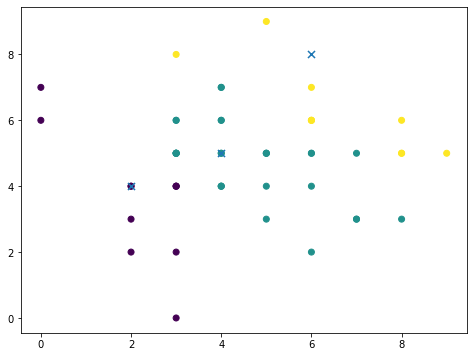

In [275]:
plt.scatter(df['x'], df['y'], c=df['cluster'])
plt.scatter(centroids.loc['x'], centroids.loc['y'], marker='x', s=50)
plt.show()

In [276]:
# @title Clustering iteration 2
# find new centroids based on each cluster's mean
df = distances
cluster_means = df.groupby('cluster')[['x', 'y']].mean().round(1)
cluster_means

,x,y
cluster,,
1,2.1,3.6
2,4.7,4.7
3,6.5,6.3


In [277]:
cluster_means = cluster_means.reset_index().drop('cluster', axis=1)

In [278]:
cluster_means

,x,y
0,2.1,3.6
1,4.7,4.7
2,6.5,6.3


In [279]:
centroids = cluster_means.T
centroids.columns = ['c1', 'c2', 'c3']
centroids

,c1,c2,c3
x,2.1,4.7,6.5
y,3.6,4.7,6.3


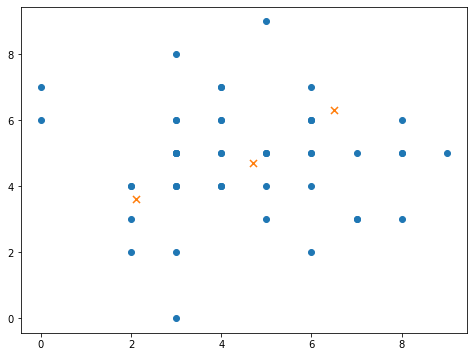

In [280]:
plt.scatter(df['x'], df['y'])
plt.scatter(centroids.loc['x'], centroids.loc['y'], marker='x', s=50)
plt.show()

In [281]:
# Create new clusters
ct = centroids
df[['c1x', 'c1y', 'c2x', 'c2y', 'c3x', 'c3y']] = list(ct['c1']) + list(ct['c2']) + list(ct['c3'])
df['d1'] = df.eval('((x-c1x)**2 + (y-c1y)**2)**0.5').round(1)
df['d2'] = df.eval('((x-c2x)**2 + (y-c2y)**2)**0.5').round(1)
df['d3'] = df.eval('((x-c3x)**2 + (y-c3y)**2)**0.5').round(1)
df.tail()
# cluster column still the old one

,x,y,c1x,c1y,c2x,c2y,c3x,c3y,d1,d2,d3,cluster
45,3,5,2.1,3.6,4.7,4.7,6.5,6.3,1.7,1.7,3.7,2
46,5,4,2.1,3.6,4.7,4.7,6.5,6.3,2.9,0.8,2.7,2
47,9,5,2.1,3.6,4.7,4.7,6.5,6.3,7.0,4.3,2.8,3
48,5,3,2.1,3.6,4.7,4.7,6.5,6.3,3.0,1.7,3.6,2
49,6,6,2.1,3.6,4.7,4.7,6.5,6.3,4.6,1.8,0.6,3


In [282]:
# update cluster column with new min distances
df['cluster'] = df[['d1', 'd2', 'd3']].idxmin(axis=1)
df['cluster'] = df['cluster'].apply(lambda x: int(x.replace('d', '')))
df.tail()

,x,y,c1x,c1y,c2x,c2y,c3x,c3y,d1,d2,d3,cluster
45,3,5,2.1,3.6,4.7,4.7,6.5,6.3,1.7,1.7,3.7,1
46,5,4,2.1,3.6,4.7,4.7,6.5,6.3,2.9,0.8,2.7,2
47,9,5,2.1,3.6,4.7,4.7,6.5,6.3,7.0,4.3,2.8,3
48,5,3,2.1,3.6,4.7,4.7,6.5,6.3,3.0,1.7,3.6,2
49,6,6,2.1,3.6,4.7,4.7,6.5,6.3,4.6,1.8,0.6,3


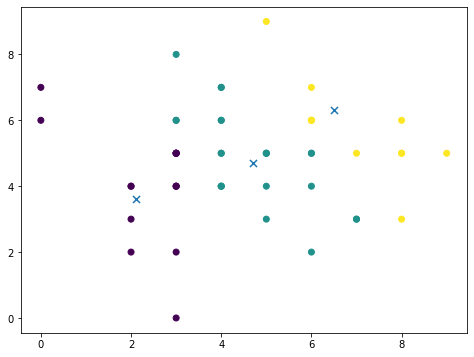

In [283]:
# Plot new clusters
plt.scatter(df['x'], df['y'], c=df['cluster'])
plt.scatter(centroids.loc['x'], centroids.loc['y'], marker='x', s=50)
plt.show()

In [284]:
# @title Culstering iteration 3
# find new centroids based on each cluster's mean
cluster_means = df.groupby('cluster')[['x', 'y']].mean().round(1)
cluster_means

,x,y
cluster,,
1,2.4,4.1
2,4.7,4.9
3,7.0,5.7


In [285]:
cluster_means = cluster_means.reset_index().drop('cluster', axis=1)
cluster_means

,x,y
0,2.4,4.1
1,4.7,4.9
2,7.0,5.7


In [286]:
centroids = cluster_means.T
centroids.columns = ['c1', 'c2', 'c3']
centroids

,c1,c2,c3
x,2.4,4.7,7.0
y,4.1,4.9,5.7


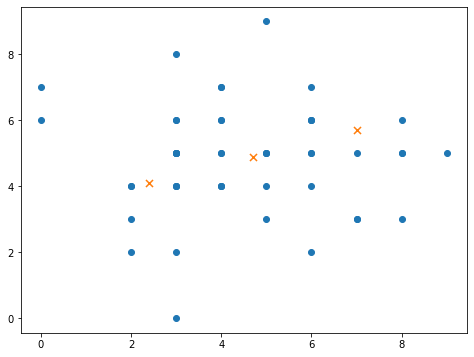

In [287]:
plt.scatter(df['x'], df['y'])
plt.scatter(centroids.loc['x'], centroids.loc['y'], marker='x', s=50)
plt.show()

In [288]:
# Create new clusters
ct = centroids
df[['c1x', 'c1y', 'c2x', 'c2y', 'c3x', 'c3y']] = list(ct['c1']) + list(ct['c2']) + list(ct['c3'])
df['d1'] = df.eval('((x-c1x)**2 + (y-c1y)**2)**0.5').round(1)
df['d2'] = df.eval('((x-c2x)**2 + (y-c2y)**2)**0.5').round(1)
df['d3'] = df.eval('((x-c3x)**2 + (y-c3y)**2)**0.5').round(1)
df.tail()

,x,y,c1x,c1y,c2x,c2y,c3x,c3y,d1,d2,d3,cluster
45,3,5,2.4,4.1,4.7,4.9,7.0,5.7,1.1,1.7,4.1,1
46,5,4,2.4,4.1,4.7,4.9,7.0,5.7,2.6,0.9,2.6,2
47,9,5,2.4,4.1,4.7,4.9,7.0,5.7,6.7,4.3,2.1,3
48,5,3,2.4,4.1,4.7,4.9,7.0,5.7,2.8,1.9,3.4,2
49,6,6,2.4,4.1,4.7,4.9,7.0,5.7,4.1,1.7,1.0,3


In [289]:
# update cluster column with new min distances
df['cluster'] = df[['d1', 'd2', 'd3']].idxmin(axis=1)
df['cluster'] = df['cluster'].apply(lambda x: int(x.replace('d', '')))
df.tail()

,x,y,c1x,c1y,c2x,c2y,c3x,c3y,d1,d2,d3,cluster
45,3,5,2.4,4.1,4.7,4.9,7.0,5.7,1.1,1.7,4.1,1
46,5,4,2.4,4.1,4.7,4.9,7.0,5.7,2.6,0.9,2.6,2
47,9,5,2.4,4.1,4.7,4.9,7.0,5.7,6.7,4.3,2.1,3
48,5,3,2.4,4.1,4.7,4.9,7.0,5.7,2.8,1.9,3.4,2
49,6,6,2.4,4.1,4.7,4.9,7.0,5.7,4.1,1.7,1.0,3


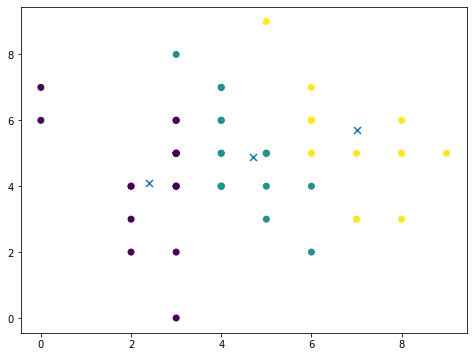

In [290]:
# Plot new clusters
plt.scatter(df['x'], df['y'], c=df['cluster'])
plt.scatter(centroids.loc['x'], centroids.loc['y'], marker='x', s=50)
plt.show()

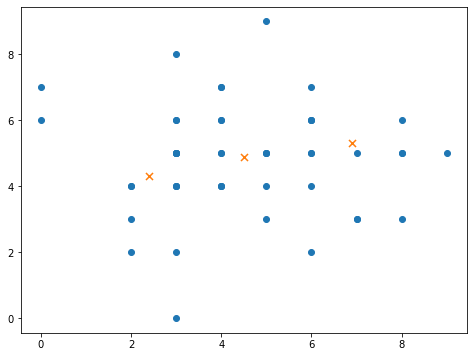

In [291]:
# @title Clustering iteration 4
cluster_means = df.groupby('cluster')[['x', 'y']].mean().round(1)
cluster_means = cluster_means.reset_index().drop('cluster', axis=1)
centroids = cluster_means.T
centroids.columns = ['c1', 'c2', 'c3']
plt.scatter(df['x'], df['y'])
plt.scatter(centroids.loc['x'], centroids.loc['y'], marker='x', s=50)
plt.show()

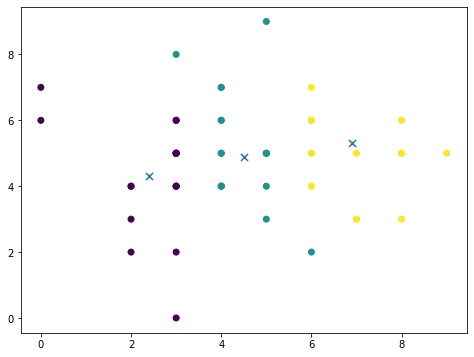

In [292]:
# Create new clusters
ct = centroids
df[['c1x', 'c1y', 'c2x', 'c2y', 'c3x', 'c3y']] = list(ct['c1']) + list(ct['c2']) + list(ct['c3'])
df['d1'] = df.eval('((x-c1x)**2 + (y-c1y)**2)**0.5').round(1)
df['d2'] = df.eval('((x-c2x)**2 + (y-c2y)**2)**0.5').round(1)
df['d3'] = df.eval('((x-c3x)**2 + (y-c3y)**2)**0.5').round(1)
# update cluster column with new min distances
df['cluster'] = df[['d1', 'd2', 'd3']].idxmin(axis=1)
df['cluster'] = df['cluster'].apply(lambda x: int(x.replace('d', '')))
# Plot new clusters
plt.scatter(df['x'], df['y'], c=df['cluster'])
plt.scatter(centroids.loc['x'], centroids.loc['y'], marker='x', s=50)
plt.show()

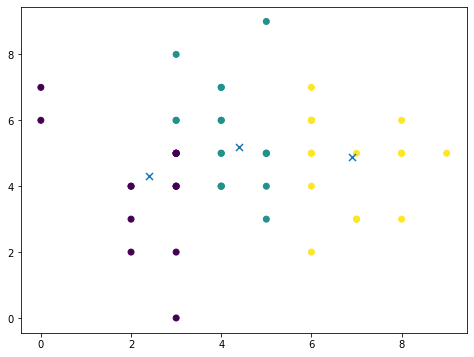

In [293]:
# @title Clustering iteration 5
cluster_means = df.groupby('cluster')[['x', 'y']].mean().round(1)
cluster_means = cluster_means.reset_index().drop('cluster', axis=1)
centroids = cluster_means.T
centroids.columns = ['c1', 'c2', 'c3']
# Create new clusters
ct = centroids
df[['c1x', 'c1y', 'c2x', 'c2y', 'c3x', 'c3y']] = list(ct['c1']) + list(ct['c2']) + list(ct['c3'])
df['d1'] = df.eval('((x-c1x)**2 + (y-c1y)**2)**0.5').round(1)
df['d2'] = df.eval('((x-c2x)**2 + (y-c2y)**2)**0.5').round(1)
df['d3'] = df.eval('((x-c3x)**2 + (y-c3y)**2)**0.5').round(1)
# update cluster column with new min distances
df['cluster'] = df[['d1', 'd2', 'd3']].idxmin(axis=1)
df['cluster'] = df['cluster'].apply(lambda x: int(x.replace('d', '')))
# Plot new clusters
plt.scatter(df['x'], df['y'], c=df['cluster'])
plt.scatter(centroids.loc['x'], centroids.loc['y'], marker='x', s=50)
plt.show()

In [294]:
def iterate():
  cluster_means = df.groupby('cluster')[['x', 'y']].mean().round(1)
  cluster_means = cluster_means.reset_index().drop('cluster', axis=1)
  centroids = cluster_means.T
  centroids.columns = ['c1', 'c2', 'c3']
  # Create new clusters
  ct = centroids
  df[['c1x', 'c1y', 'c2x', 'c2y', 'c3x', 'c3y']] = list(ct['c1']) + list(ct['c2']) + list(ct['c3'])
  df['d1'] = df.eval('((x-c1x)**2 + (y-c1y)**2)**0.5').round(1)
  df['d2'] = df.eval('((x-c2x)**2 + (y-c2y)**2)**0.5').round(1)
  df['d3'] = df.eval('((x-c3x)**2 + (y-c3y)**2)**0.5').round(1)
  # update cluster column with new min distances
  df['cluster'] = df[['d1', 'd2', 'd3']].idxmin(axis=1)
  df['cluster'] = df['cluster'].apply(lambda x: int(x.replace('d', '')))
  # Plot new clusters
  plt.scatter(df['x'], df['y'], c=df['cluster'])
  plt.scatter(centroids.loc['x'], centroids.loc['y'], marker='x', s=50)
  plt.show()

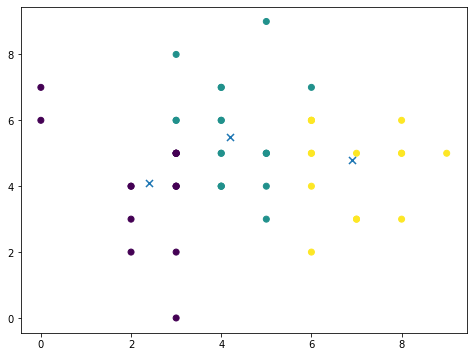

In [295]:
# @title Clustering iteration 6 + 
iterate()

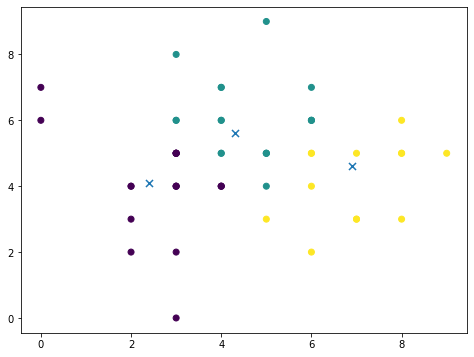

In [296]:
iterate()

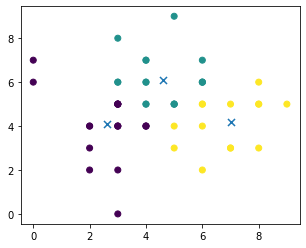

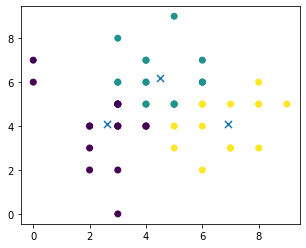

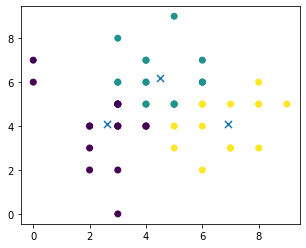

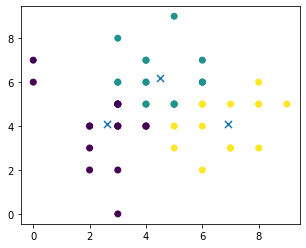

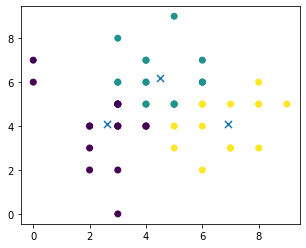

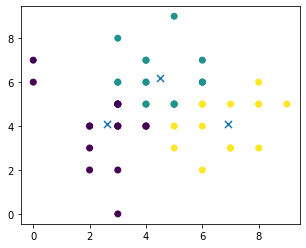

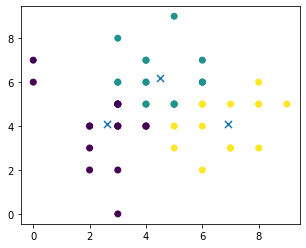

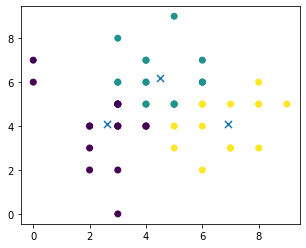

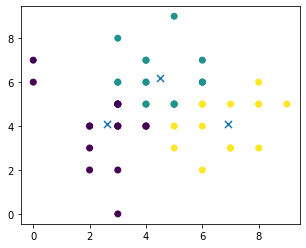

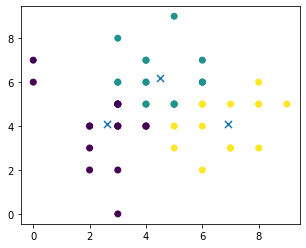

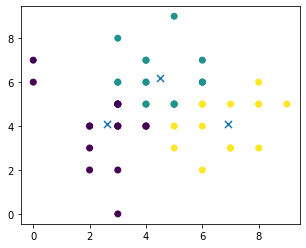

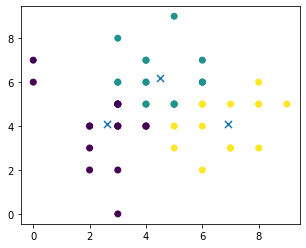

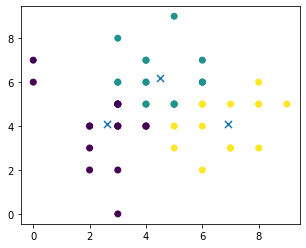

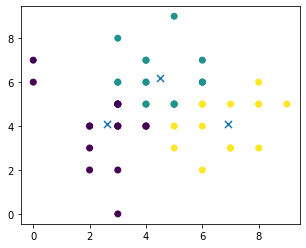

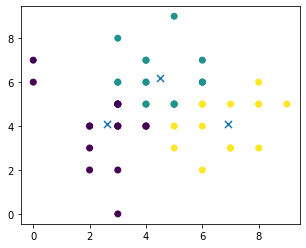

In [297]:
plt.rcParams['figure.figsize'] = [5,4]
for i in range(15):
  iterate()